In [1]:
# import itertools
import os
import sys
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.io

from collections import defaultdict
from tqdm.auto import tqdm
from joblib import Parallel, delayed
import re
import h5py
import napari
import tifffile as tiff
import seaborn as sns
import pickle

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
p_dir = (Path().cwd().parents[0]).absolute()

module_path = str(p_dir / "src")
 
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
data_dir_ori = Path(r'Y:\coskun-lab\Thomas\15_PLA\data')
data_dir = data_dir = (Path().cwd().parents[0] / 'data').absolute()

# Get image dataframe 
df_imgs_path = data_dir_ori / 'OCT Cell culture' / 'Whole' / 'metadata' / 'imgs_reg_norm.csv'
df_imgs = pd.read_csv(df_imgs_path)


# Visualization PPI distribution

In [5]:
import networkx as nx

def read_pkl(path):
    with open(path, 'rb') as f:
        item = pickle.load(f)
    return item

def get_contours(contours, key, cell):
    contour_cell = contours[key]['Cell'][int(cell)]
    try:
        contour_nuclei = contours[key]['Nuclei'][int(cell)]
    except:
        contour_nuclei = None
    return contour_cell, contour_nuclei

def plot_network(g, label, ax, **kwargs):
    pos = nx.get_node_attributes(g, 'pos')
    pos_T = {k: v[[1,0]] for k,v in pos.items()}
    
    nx.draw(g, pos_T, node_color=label, with_labels=False, ax=ax, **kwargs)
    return ax
    
def plot_contour(contour_cell, contour_nuclei, ax, linewidth=2):
    contour = max(contour_cell, key = len)
    ax.plot(contour[:, 1], contour[:, 0], linewidth=linewidth, color='red')
    try:
        contour = max(contour_nuclei, key = len)
        ax.plot(contour[:, 1], contour[:, 0], linewidth=linewidth, color='blue')
    except:
        pass

In [6]:
from sklearn.preprocessing import OneHotEncoder
import matplotlib 
import scanpy

# Get encoder 
PPI_save_path =  data_dir_ori / 'OCT Cell Culture' / 'Whole' / 'PPI'

# Read PPi info 
dfs = []
for path in os.listdir(PPI_save_path):
    if 'csv' in path:
        df = pd.read_csv(PPI_save_path / path)
        dfs.append(df)
df = pd.concat(dfs)

# Create label 
enc = OneHotEncoder(handle_unknown='ignore')
labels = enc.fit_transform(df['PPI'].to_numpy().reshape(-1, 1)).toarray().astype(np.uint8)
df['Labels'] = labels.tolist()
print(enc.categories_)
PPIs_name = enc.categories_[0]

# Define colormap
colors = [ '#ff00ff', '#00FF00', '#FF0000',  '#00FFFF', '#FFFF00']

colors_rgb = []
for color in colors:
    colors_rgb.append(matplotlib.colors.hex2color(color))
colors_rgb = np.array(colors_rgb) * 255
colors_rgb = colors_rgb.astype(np.uint8)

colors_rgb_dict = {k:v for k,v in zip(PPIs_name, colors_rgb)}

[array(['CylinE & CDK2', 'Mcl-1 & BAK', 'P-ERK & c-MYC', 'TEAD1 & YAP1',
       'p-AKT & mTOR'], dtype=object)]


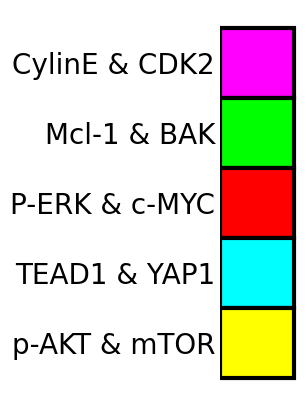

In [7]:
# legend
fig, ax = plt.subplots(figsize=(1,len(PPIs_name)))
ax.barh(y=range(len(colors_rgb_dict.values())), 
        color=np.array(list(colors_rgb_dict.values()))/255,
        width=1, 
        height=1,
        edgecolor='k',
        linewidth=3,
       )

_ = plt.yticks(range(len(colors_rgb_dict.values())), colors_rgb_dict.keys(), rotation=0, size=20)
_ = plt.xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
# ax.yaxis.tick_right()
ax.invert_yaxis()
ax.grid(False)

In [8]:
import PLA

graph_save_path =  data_dir_ori / 'OCT Cell Culture' / 'Whole' / 'graphs' / 'raw'
contour_save_path =  data_dir_ori / 'OCT Cell Culture' / 'Whole' / 'contours'

cell_data = PLA.cell_data(contour_save_path, graph_save_path)

Loading graphs
Loading contours


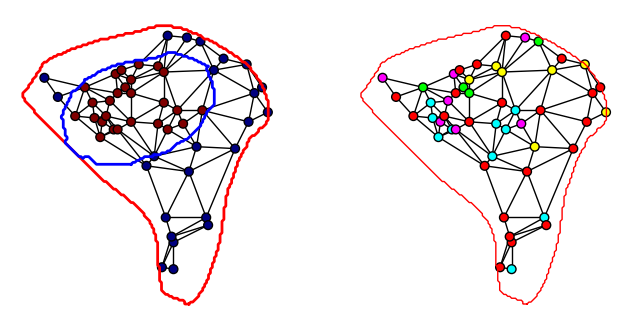

c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


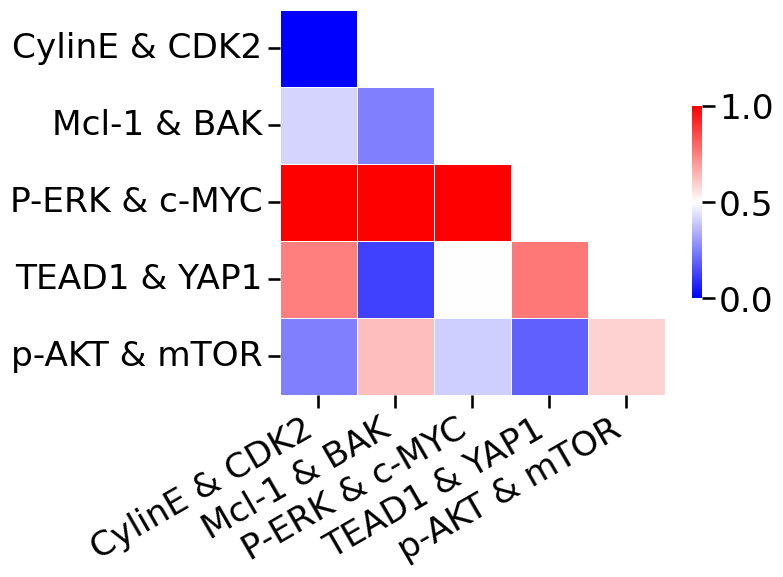

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


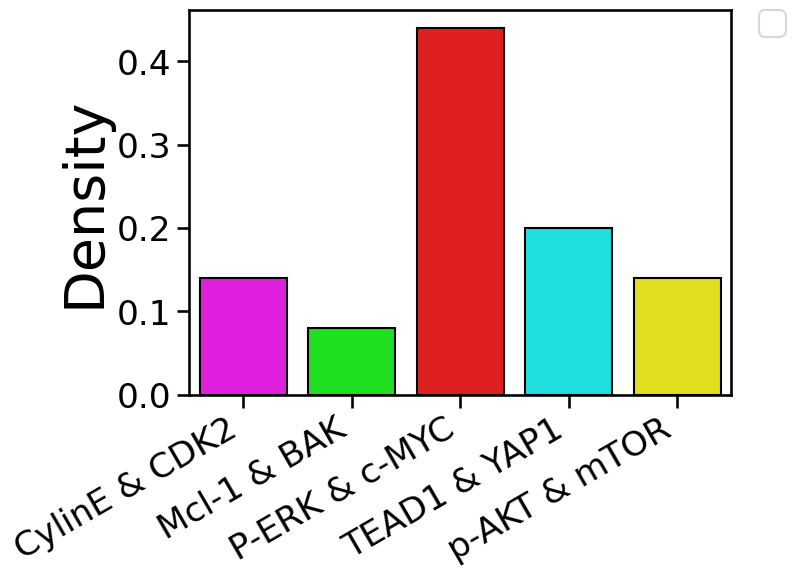

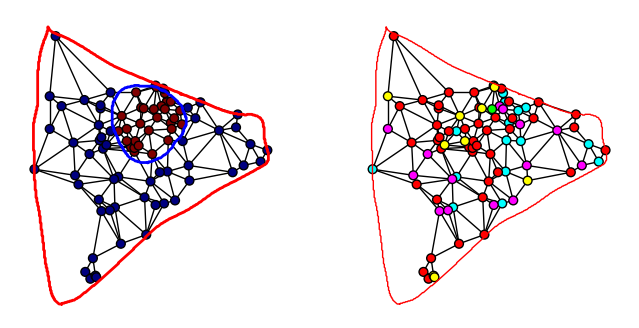

c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


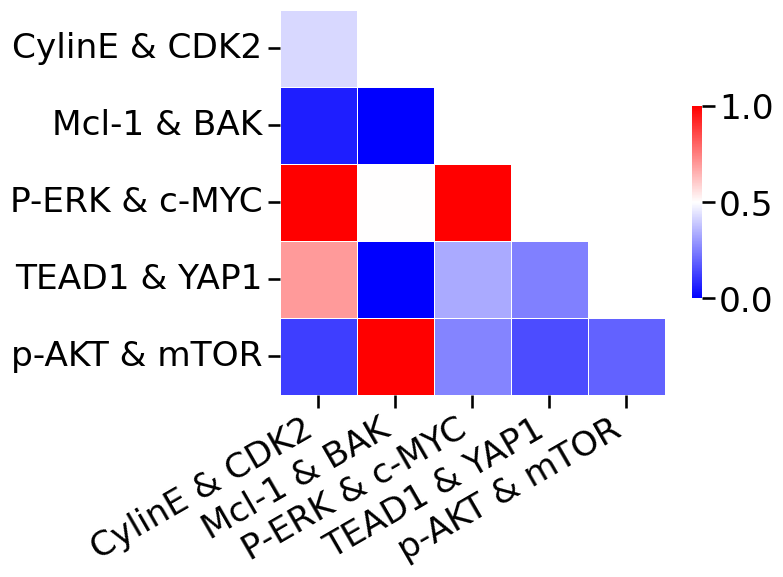

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


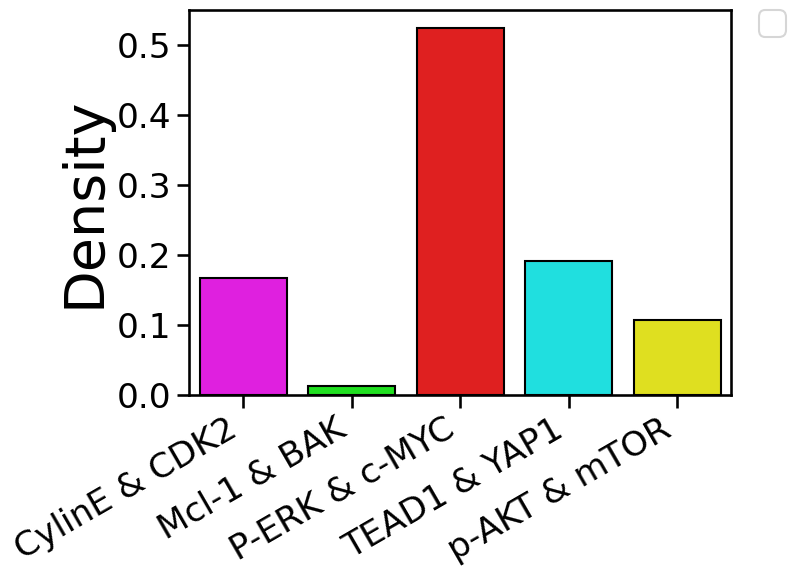

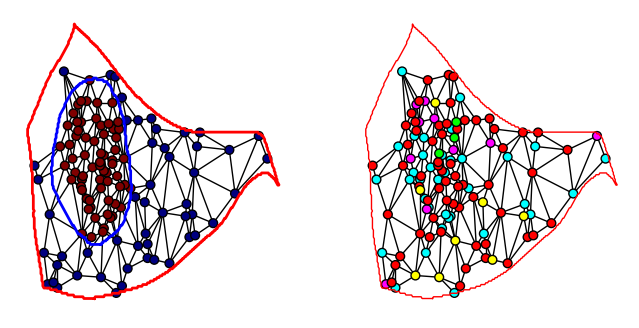

c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


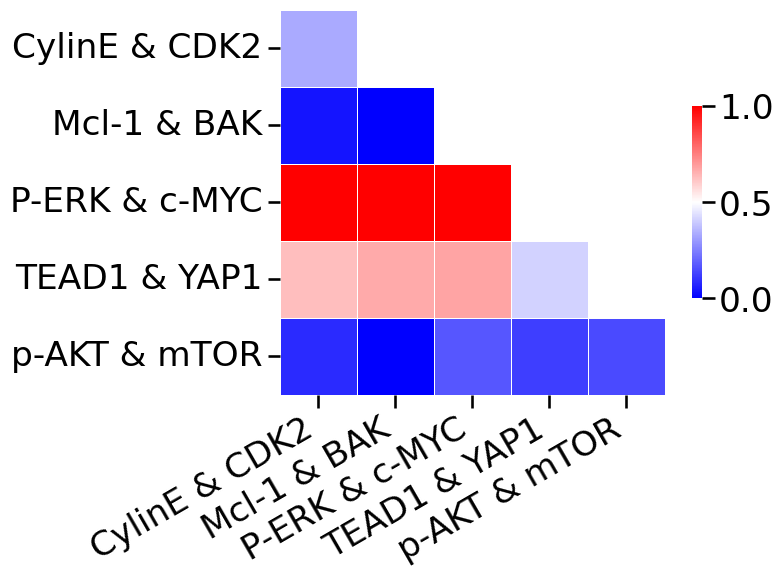

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


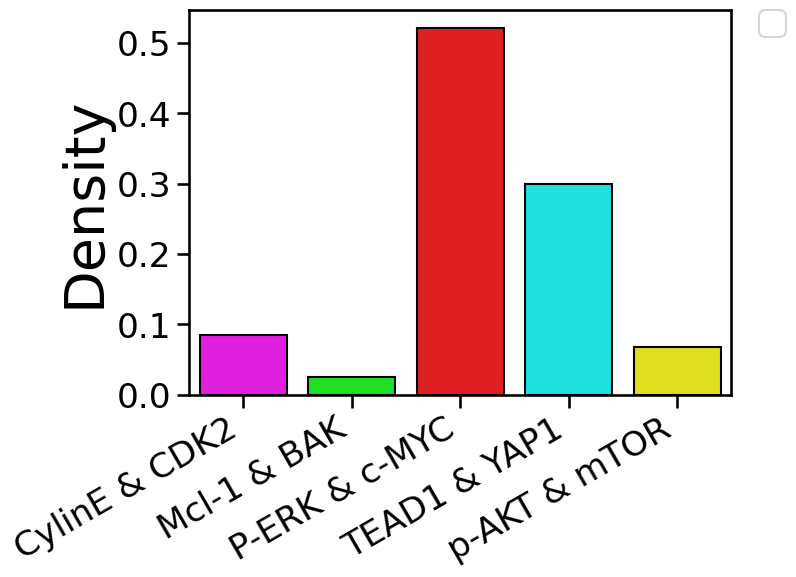

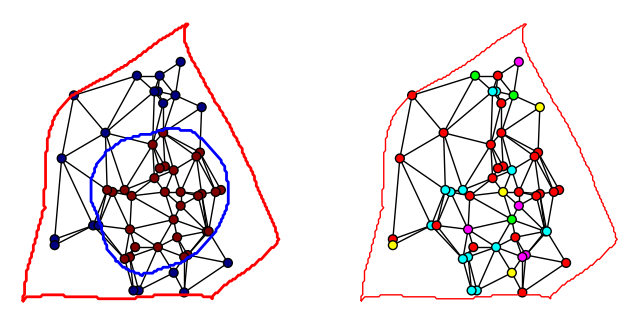

c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


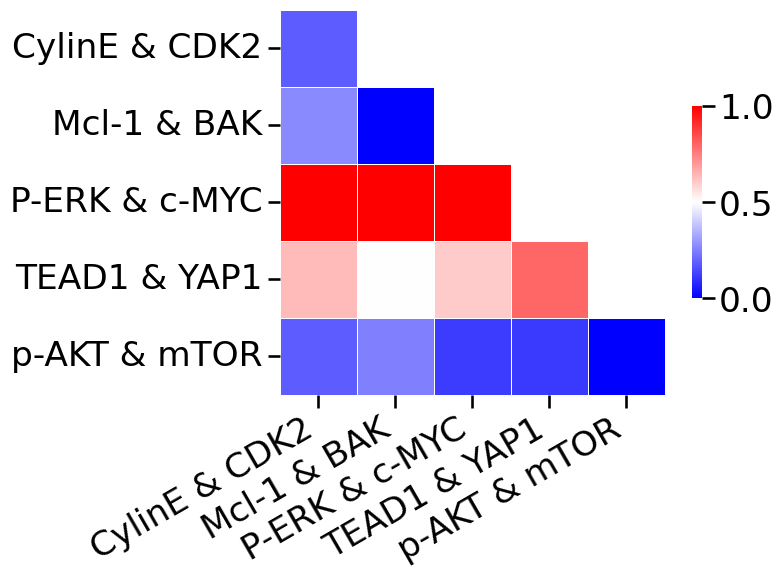

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


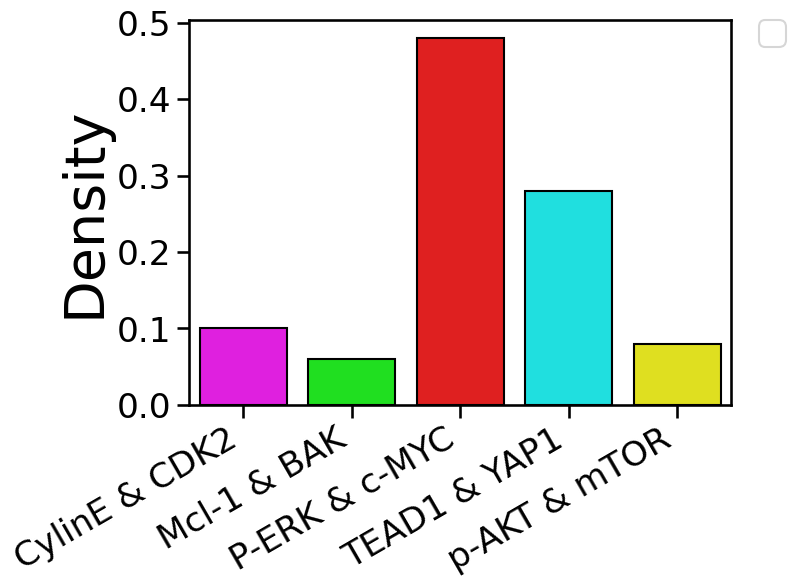

In [9]:
df_subset = cell_data.df.sample(10, random_state=0)
df_counts = []
for n, i in enumerate([1, 5, 6, 9]):
    # Info
    row = df_subset.iloc[i]
    key = '_'.join(row.iloc[:2])
    cell = row.iloc[2]
    
    # Get graph
    network = read_pkl(row.Path)
    network.remove_edges_from(list(nx.selfloop_edges(network)))
    
    nuclei = list(nx.get_node_attributes(network, 'nuclei').values())
    labels = list(nx.get_node_attributes(network, 'labels').values())
    labels = np.argmax(labels, axis=1)
    node_colors = [colors_rgb_dict[PPIs_name[i]]/255 for i in labels]

    # Get contours
    contour_cell, contour_nuclei = get_contours(cell_data.contours, key, cell)
    
    # Plot
    f, axs = plt.subplots(1, 2, figsize=(8,4))
    ax = axs[0]
    ax = plot_network(network,  nuclei, ax, node_size=40, cmap='jet', edgecolors='k')
    plot_contour(contour_cell, contour_nuclei, ax)
    ax = axs[1]
    ax = plot_network(network,  node_colors , ax, node_size=40, edgecolors='k')
    plot_contour(contour_cell, None, ax, linewidth=1)
    axs[0].invert_yaxis()
    axs[1].invert_yaxis()
    plt.show()

    # Connectivity Plot
    connections = []
    edges = np.array(network.edges())
    neighbors = PPIs_name[labels[edges]]
    connections.append(neighbors)
    neighbors = PPIs_name[labels[edges[:,::-1]]] # Reverse to count symmetric
    connections.append(neighbors)

    # Get connection matrix
    con = np.vstack(connections)
    df_conn = pd.DataFrame(con, columns=['col1', 'col2'])
    count_matrix = pd.crosstab(index=df_conn["col1"], columns=df_conn["col2"])
    count_matrix = count_matrix.rename_axis(index=None, columns=None)

    # Plot heatmap
    mask = np.triu(np.ones_like(count_matrix, dtype=bool))
    np.fill_diagonal(mask, False)

    # Generate a custom diverging colormap
    cmap = 'bwr'

    # Draw the heatmap with the mask and correct aspect ratio
    with sns.plotting_context('talk', font_scale=1.5):
        fig, ax = plt.subplots(figsize=(7,5))
        g = sns.heatmap(count_matrix/np.max(count_matrix), mask=mask, cmap=cmap, 
                    square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

        ax.grid(False)
        g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
        plt.show()
    
    # Count plot
    v, c = np.unique(labels, return_counts=True)
    df_count = pd.DataFrame({'PPI': [PPIs_name[i] for i in v], 'Count': c/c.sum()})
    with sns.plotting_context('talk', font_scale=1.5):
        fig, ax = plt.subplots(figsize=(7,5))
        sns.barplot(x=df_count.PPI.tolist(), y=df_count.Count.values.flatten(),
                    palette=np.array(list(colors_rgb_dict.values()))/255, edgecolor='k')
        ax.set_ylabel('Density', fontsize=40)
        plt.xticks(rotation=30, ha='right')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

    df_count = count_matrix.stack().reset_index()
    df_count.columns = ['PPI1', 'PPI2', 'Count']
    df_count['ID'] = n
    df_counts.append(df_count)

In [10]:
df_count = pd.concat(df_counts)

In [11]:
df_count['Interaction'] = df_count['PPI1'] + ' - ' + df_count['PPI2']

In [12]:
subset = ['P-ERK & c-MYC - Mcl-1 & BAK', 'TEAD1 & YAP1 - Mcl-1 & BAK', 'TEAD1 & YAP1 - P-ERK & c-MYC',
       'TEAD1 & YAP1 - TEAD1 & YAP1']
df_subset = df_count[df_count['Interaction'].isin(subset)].reset_index(drop=True)

In [13]:
df_subset

,PPI1,PPI2,Count,ID,Interaction
0,P-ERK & c-MYC,Mcl-1 & BAK,8,0,P-ERK & c-MYC - Mcl-1 & BAK
1,TEAD1 & YAP1,Mcl-1 & BAK,1,0,TEAD1 & YAP1 - Mcl-1 & BAK
2,TEAD1 & YAP1,P-ERK & c-MYC,21,0,TEAD1 & YAP1 - P-ERK & c-MYC
3,TEAD1 & YAP1,TEAD1 & YAP1,16,0,TEAD1 & YAP1 - TEAD1 & YAP1
4,P-ERK & c-MYC,Mcl-1 & BAK,1,1,P-ERK & c-MYC - Mcl-1 & BAK
5,TEAD1 & YAP1,Mcl-1 & BAK,0,1,TEAD1 & YAP1 - Mcl-1 & BAK
6,TEAD1 & YAP1,P-ERK & c-MYC,40,1,TEAD1 & YAP1 - P-ERK & c-MYC
7,TEAD1 & YAP1,TEAD1 & YAP1,10,1,TEAD1 & YAP1 - TEAD1 & YAP1
8,P-ERK & c-MYC,Mcl-1 & BAK,9,2,P-ERK & c-MYC - Mcl-1 & BAK
9,TEAD1 & YAP1,Mcl-1 & BAK,6,2,TEAD1 & YAP1 - Mcl-1 & BAK


In [15]:
df_count.to_clipboard()

C:\Users\thu71\AppData\Local\Temp\ipykernel_15196\2249504257.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels=['', 0, '', 1, '' ,2, '' ,3])


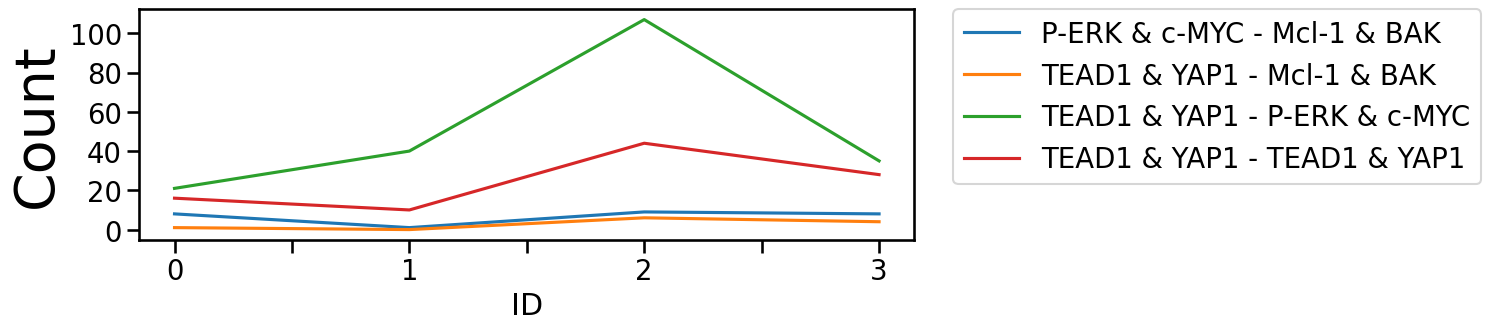

In [45]:
with sns.plotting_context('talk', font_scale=1.2):
    fig, ax = plt.subplots(figsize=(10,3))
    g = sns.lineplot(data=df_subset, x='ID', y='Count', hue='Interaction')
    ax.set_ylabel('Count', fontsize=40)
    g.set(xticklabels=['', 0, '', 1, '' ,2, '' ,3])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


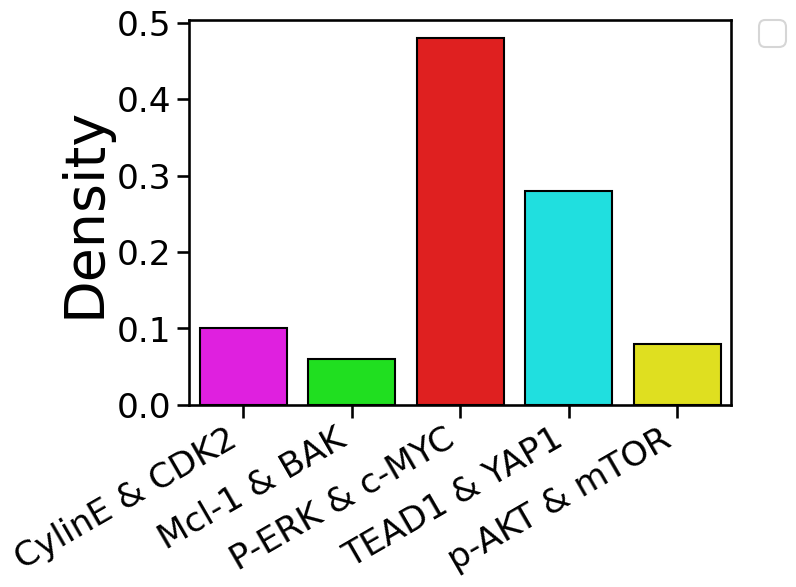

In [10]:
# Count plot
v, c = np.unique(labels, return_counts=True)
df_count = pd.DataFrame({'PPI': [PPIs_name[i] for i in v], 'Count': c/c.sum()})
with sns.plotting_context('talk', font_scale=1.5):
    fig, ax = plt.subplots(figsize=(7,5))
    sns.barplot(x=df_count.PPI.tolist(), y=df_count.Count.values.flatten(),
                palette=np.array(list(colors_rgb_dict.values()))/255, edgecolor='k')
    ax.set_ylabel('Density', fontsize=40)
    plt.xticks(rotation=30, ha='right')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)